In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression as lin
from sklearn.metrics import mean_squared_error as mse

In [7]:
# BASIC SET UP
url = 'https://raw.githubusercontent.com/aakayan/320_College_Data_Tutorial/main/data.txt'
df = pd.read_csv(url) # Read the data
pd.options.display.max_columns = None #removes the limit on the maximum columns you can view
drop_cols = ['blackNH_ugds','whiteNH_ugds', 'act_wr_75pct', 'act_wr_mid', 'act_wr_25pct', 'sat_wr_25pct', 'sat_wr_mid', 'sat_wr_75pct', 'act_en_25pct', 'act_en_75pct', 'act_mt_mid', 'act_en_mid', 'act_mt_75pct', 'act_mt_25pct', 'sat_vr_75pct', 'sat_vr_25pct', 'sat_vr_mid', 'sat_mt_mid', 'sat_mt_25pct', 'sat_mt_75pct', 'act_cm_75pct', 'act_cm_25pct', 'act_cm_mid', 'sat_avg', 'sat_avg_all', 'Unnamed: 0']
df = df.drop(columns=drop_cols)

unit_id                            inst_name        city state         zip  \
0   100654             Alabama A & M University      Normal    AL       35762   
1   100663  University of Alabama at Birmingham  Birmingham    AL  35294-0110   
2   100690                   Amridge University  Montgomery    AL  36117-3553   
3   100706  University of Alabama in Huntsville  Huntsville    AL       35899   
4   100724             Alabama State University  Montgomery    AL  36104-0271   

                                         accred_inst  \
0  Southern Association of Colleges and Schools C...   
1  Southern Association of Colleges and Schools C...   
2  Southern Association of Colleges and Schools C...   
3  Southern Association of Colleges and Schools C...   
4  Southern Association of Colleges and Schools C...   

                    inst_url  \
0              www.aamu.edu/   
1        https://www.uab.edu   
2  www.amridgeuniversity.edu   
3                www.uah.edu   
4              www.alasu.edu   

                                      net_price_calc  height_cash_monitoring  \
0  www.aamu.edu/admissions-aid/tuition-fees/net-p...                       0   
1   https://uab.studentaidcalculator.com/survey.aspx                       0   
2                   www2.amridgeuniversity.edu:9091/                       0   
3                                    finaid.uah.edu/                       0   
4  www.alasu.edu/cost-aid/tuition-costs/net-price...                       0   

    latitude  longitude  hbcu  pbi  ANNHI  tribal  AANAPII  hisp_serving_inst  \
0  34.783368 -86.568502   1.0  0.0    0.0     0.0      0.0                0.0   
1  33.505697 -86.799345   0.0  0.0    0.0     0.0      0.0                0.0   
2  32.362609 -86.174010   0.0  1.0    0.0     0.0      0.0                0.0   
3  34.724557 -86.640449   0.0  0.0    0.0     0.0      0.0                0.0   
4  32.364317 -86.295677   1.0  0.0    0.0     0.0      0.0                0.0   

   NANTI  men_only  women_only  adm_rate  adm_rate_all     UGDS  white_ugds  \
0    0.0       0.0         0.0    0.8986        0.8986   4990.0      0.0186   
1    0.0       0.0         0.0    0.9211        0.9211  13186.0      0.5717   
2    0.0       0.0         0.0       NaN           NaN    351.0      0.2393   
3    0.0       0.0         0.0    0.8087        0.8087   7458.0      0.7167   
4    0.0       0.0         0.0    0.9774        0.9774   3903.0      0.0167   

   black_ugds  hisp_ugds  asian_ugds  AIAN_ugds  NHPI_ugds  birac_ugds  \
0      0.9120     0.0088      0.0018     0.0022     0.0016      0.0118   
1      0.2553     0.0334      0.0633     0.0034     0.0002      0.0457   
2      0.7151     0.0171      0.0057     0.0057     0.0000      0.0000   
3      0.0969     0.0528      0.0381     0.0095     0.0008      0.0296   
4      0.9352     0.0095      0.0041     0.0013     0.0005      0.0102   

   non_res_alien_ugds  unkn_ugds  title4_stud_pub  title4_stud_priv  \
0              0.0070     0.0361            592.0               NaN   
1              0.0213     0.0058           1229.0               NaN   
2              0.0000     0.0171              NaN               5.0   
3              0.0223     0.0333            585.0               NaN   
4              0.0102     0.0123            523.0               NaN   

   atnd_cost_acad_yr  in_st_tuition  out_st_tuition  net_tuition_rev_per_fts  \
0            22489.0         9744.0         18354.0                   7413.0   
1            24347.0         8568.0         19704.0                  13177.0   
2            17680.0         6900.0          6900.0                  14273.0   
3            23441.0        10714.0         22362.0                   8677.0   
4            21476.0        11068.0         19396.0                  10160.0   

   inst_expend_per_fts  avg_fac_salary  full_time_faculty_pct  
0               5384.0          7101.0                 0.7411  
1              16454.0         10717.0                 0.7766 

## STUFF THAT I TOOK FROM SHARON'S NOTEBOOK AND UPDATED TO INCLUDE REGIONS.

In order to further explore geographical trends in racial demographics, we can plot the different percentage of students of each rate on a scatterplot by location. Grouping racial demographic by latitude and longitude is less meaningful in the US, where multiple states with a variety of socioeconomic situations exist at similar latitudes or longitudes. Instead, we can look at the demographic breakdown of universities by state and by regions in the US.

The US can be classified by 5 regions: West, Midwest, NorthEast, SouthEast, and SouthWest


In [43]:
# Create arrays for US regions
NE = ['ME', 'MA', 'RI', 'CT', 'NH', 'VT', 'NY', 'PA', 'NJ', 'DE', 'MD', 'DC']
SE = ['WV', 'VA', 'KY', 'TN', 'NC', 'SC', 'GA', 'AL', 'MS', 'AR', 'LA', 'FL']
MW = ['OH', 'IN', 'MI', 'IL', 'MO', 'WI', 'MN', 'IA', 'KS', 'NE', 'SD', 'ND']
SW = ['TX', 'OK', 'NM', 'AZ']
W = ['CO', 'WY', 'MT', 'ID', 'WA', 'OR', 'UT', 'NV', 'CA', 'AK', 'HI']

# Filter dataframes to be region exclusive
NE_df = df.loc[df['state'].isin(NE)]
SE_df = df.loc[df['state'].isin(SE)]
MW_df = df.loc[df['state'].isin(MW)]
SW_df = df.loc[df['state'].isin(SW)]
W_df = df.loc[df['state'].isin(W)]

# Create a struct for making the graphs
tables = [[NE_df,0,0], [SE_df,0,1], [MW_df,0,2], [SW_df,1,0], [W_df,1,1]]

<ipython-input-76-e2d389e65739>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


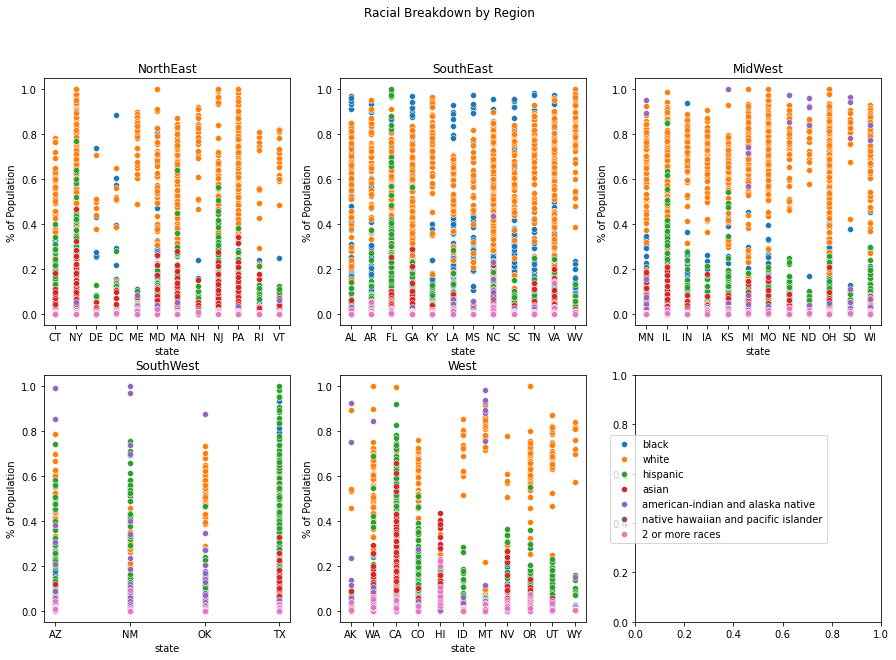

In [76]:
# Create a matplotlib figure, assign title and labels


fig,ax = plt.subplots(2,3) # Create a 2x3 grid to place down graphs
fig.set_figheight(10) # Set height and width
fig.set_figwidth(15)
fig.suptitle('Racial Breakdown by Region') # Title of overall figure
ax[0, 0].set(title='NorthEast', ylabel='% of Population') # Label top left graph and axes
ax[0, 1].set(title='SouthEast', ylabel='% of Population') # Top middle graph
ax[0, 2].set(title='MidWest', ylabel='% of Population') # Top right graph
ax[1, 0].set(title='SouthWest', ylabel='% of Population') # Bottom left graph
ax[1, 1].set(title='West', ylabel='% of Population') # Bottom mid graph

for [a,b,c] in tables: # x axis is state, y axis is % of population, ax determines which graph
    sns.scatterplot(x=a.state, y=a.black_ugds, ax=ax[b][c])
    sns.scatterplot(x=a.state, y=a.white_ugds, ax=ax[b][c])
    sns.scatterplot(x=a.state, y=a.hisp_ugds, ax=ax[b][c])
    sns.scatterplot(x=a.state, y=a.asian_ugds, ax=ax[b][c])
    sns.scatterplot(x=a.state, y=a.AIAN_ugds, ax=ax[b][c])
    sns.scatterplot(x=a.state, y=a.NHPI_ugds, ax=ax[b][c])
    sns.scatterplot(x=a.state, y=a.NHPI_ugds, ax=ax[b][c])
ax[1, 1].legend(["black", 'white', 'hispanic', 'asian', 'american-indian and alaska native', 'native hawaiian and pacific islander', '2 or more races'], bbox_to_anchor=(2, .3)) # Create legend for bottom mid graph, anchor it in bottom right graph
ax[1, 2].set_zorder(-1) # Move bottom right graph behind legend
fig.show()

## Next let's take a look at race vs. acceptance rate

For this one, we're going to use some machine learning, particularly linear regression.

R squared:		 0.007290134862703246
Coefficient:		 -0.01965678931721349
Y intercept:		 2720.2549338340173
Mean squared error:	 13541223.879117632


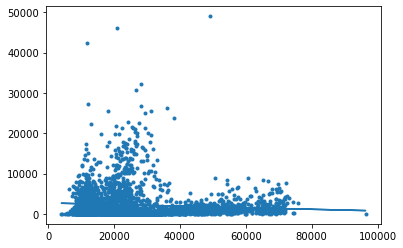

In [60]:
# WHITE
data = {}  # Dict of {cost:num_of_students}
for ind,r in df.iterrows():
    num = r['white_ugds'] * r['UGDS']
    cost = r['atnd_cost_acad_yr']
    if cost in data:
        data[cost] = num + data[cost]
    else:
        data[cost] = num

# Transfer dict into a new dataframe
white_df = pd.DataFrame(data.items(), columns=['cost', 'pop'])

# Make x and y arrays for linear regression
x = np.array(white_df['cost']).reshape(-1,1)
y = np.array(white_df['pop']).reshape(-1,1)
lin_reg = lin().fit(x,y)

print("R squared:\t\t", lin_reg.score(x,y))
print("Coefficient:\t\t", lin_reg.coef_[0][0])
print("Y intercept:\t\t", lin_reg.intercept_[0])

# Linear prediction
y_pred = lin_reg.predict(x)
print("Mean squared error:\t", mse(white_df['pop'], y_pred))

# Display the graph with the linear regression
plt.scatter(white_df['cost'], white_df['pop'], marker='.')
plt.plot(white_df['cost'], y_pred)
plt.show()

R squared:		 0.02601173667705381
Coefficient:		 -0.012023279959584274
Y intercept:		 884.7414511290336
Mean squared error:	 1393080.687335278


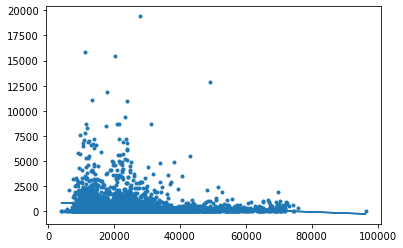

In [61]:
# BLACK
data = {}  # Dict of {cost:num_of_students}
for ind,r in df.iterrows():
    num = r['black_ugds'] * r['UGDS']
    cost = r['atnd_cost_acad_yr']
    if cost in data:
        data[cost] = num + data[cost]
    else:
        data[cost] = num

# Transfer dict into a new dataframe
black_df = pd.DataFrame(data.items(), columns=['cost', 'pop'])

# Make x and y arrays for linear regression
x = np.array(black_df['cost']).reshape(-1,1)
y = np.array(black_df['pop']).reshape(-1,1)
lin_reg = lin().fit(x,y)

print("R squared:\t\t", lin_reg.score(x,y))
print("Coefficient:\t\t", lin_reg.coef_[0][0])
print("Y intercept:\t\t", lin_reg.intercept_[0])

# Linear prediction
y_pred = lin_reg.predict(x)
print("Mean squared error:\t", mse(black_df['pop'], y_pred))

# Display the graph with the linear regression
plt.scatter(black_df['cost'], black_df['pop'], marker='.')
plt.plot(black_df['cost'], y_pred)
plt.show()

R squared:		 0.0006888538858953464
Coefficient:		 -0.001442229710223871
Y intercept:		 328.5541345404156
Mean squared error:	 776584.0598884593


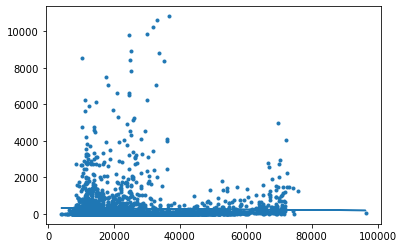

In [62]:
# ASIAN
data = {}  # Dict of {cost:num_of_students}
for ind,r in df.iterrows():
    num = r['asian_ugds'] * r['UGDS']
    cost = r['atnd_cost_acad_yr']
    if cost in data:
        data[cost] = num + data[cost]
    else:
        data[cost] = num

# Transfer dict into a new dataframe
asian_df = pd.DataFrame(data.items(), columns=['cost', 'pop'])

# Make x and y arrays for linear regression
x = np.array(asian_df['cost']).reshape(-1,1)
y = np.array(asian_df['pop']).reshape(-1,1)
lin_reg = lin().fit(x,y)

print("R squared:\t\t", lin_reg.score(x,y))
print("Coefficient:\t\t", lin_reg.coef_[0][0])
print("Y intercept:\t\t", lin_reg.intercept_[0])

# Linear prediction
y_pred = lin_reg.predict(x)
print("Mean squared error:\t", mse(asian_df['pop'], y_pred))

# Display the graph with the linear regression
plt.scatter(asian_df['cost'], asian_df['pop'], marker='.')
plt.plot(asian_df['cost'], y_pred)
plt.show()

For linear regression, Black has the greatest coefficient of -.019, while white has 2nd at -.012, and then lastly Asian at -.001, which is almost 0. Looking at the graphs, we can see that White and Black are both pretty strongly centered around the linear regression line, but black deviates from the line more than white does further left at the lower cost. This is what leads it to have a smaller coefficient in its linear regression line. Asian on the other hand has less of a deviation on the left hand side, and is balanced out by a deviation on the right side of the graph as well. The data here is pretty well spread out, leading to a coefficient of just about 0.